In [29]:
# import sys
# IN_COLAB = 'google.colab' in sys.modules

# if IN_COLAB:
#     !pip install deriva
#     !pip install bdbag
#     !pip install --upgrade --force pydantic
#     !pip install git+https://github.com/informatics-isi-edu/deriva-ml git+https://github.com/informatics-isi-edu/eye-ai-ml

In [30]:
repo_dir = "Repos"   # Set this to be where your github repos are located.
%load_ext autoreload
%autoreload 2

# Update the load path so python can find modules for the model
import sys
from pathlib import Path
sys.path.insert(0, str(Path.home() / repo_dir / "eye-ai-ml"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Prerequisites

import json
import os
from eye_ai.eye_ai import EyeAI
import pandas as pd
from pathlib import Path, PurePath
import logging
# import torch

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', force=True)

In [32]:

from deriva.core.utils.globus_auth_utils import GlobusNativeLogin
catalog_id = "eye-ai" #@param
host = 'www.eye-ai.org'


gnl = GlobusNativeLogin(host=host)
if gnl.is_logged_in([host]):
    print("You are already logged in.")
else:
    gnl.login([host], no_local_server=True, no_browser=True, refresh_tokens=True, update_bdbag_keychain=True)
    print("Login Successful")

2024-06-28 07:02:36,888 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-06-28 07:02:36,889 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>


You are already logged in.


In [33]:
# Variables to configure the rest of the notebook.

cache_dir = '/data'        # Directory in which to cache materialized BDBags for datasets
working_dir = '/data'    # Directory in which to place output files for later upload.

configuration_rid = "2-C8RG" # rid
# Change the confi_file with bag_url=["minid: train", "minid: Valid", "minid: test"]



In [34]:
EA = EyeAI(hostname = host, catalog_id = catalog_id, cache_dir= cache_dir, working_dir=working_dir)

2024-06-28 07:02:43,456 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-06-28 07:02:43,457 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>


In [35]:
# @title Initiate an Execution
configuration_records = EA.execution_init(configuration_rid=configuration_rid)
configuration_records.model_dump()

2024-06-28 07:02:45,456 - INFO - File [/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_laterality_sreenidhi_june_27_2024.json] transfer successful. 0.97 KB transferred. Elapsed time: 0:00:00.000060.
2024-06-28 07:02:45,457 - INFO - Verifying MD5 checksum for downloaded file [/data/sreenidhi/EyeAI_working/Execution_Metadata/Execution_Config-vgg19_catalog_model_training_LACDHS_laterality_sreenidhi_june_27_2024.json]
2024-06-28 07:02:45,495 - INFO - Configuration validation successful!
2024-06-28 07:02:53,169 - INFO - File [/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json] transfer successful. 0.69 KB transferred. Elapsed time: 0:00:00.000098.
2024-06-28 07:02:53,169 - INFO - Verifying SHA256 checksum for downloaded file [/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json]
2024-06-28 07:02:53,369 - INFO - 

{'caching_dir': PosixPath('/data'),
 'working_dir': PosixPath('/data/sreenidhi/EyeAI_working'),
 'vocabs': {'Workflow_Type': [{'name': 'VGG19_Catalog_Model_LACDHS_laterality_training',
    'rid': '2-C8RM'}],
  'Execution_Asset_Type': [{'name': 'VGG19_Catalog_Model_LACDHS_laterality_training',
    'rid': '2-C8RP'}]},
 'execution_rid': '2-C8RJ',
 'workflow_rid': '2-C8RR',
 'bag_paths': [PosixPath('/data/2-277G_6aa1a6861eee5a79bce4bf071065355f95a066c2a1ff326089d43048a7e0f185/Dataset_2-277G'),
  PosixPath('/data/2-277J_81c873a311aa6a67cf2eef44bd9056cb19181b299a6e44327ea3553616f18725/Dataset_2-277J'),
  PosixPath('/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M')],
 'assets_paths': [PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'),
  PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/train_no_optic_disc_image_ids.csv'),
  PosixPath('/data/sreenidhi/EyeAI_workin

In [36]:
configuration_records

ConfigurationRecord(caching_dir=PosixPath('/data'), working_dir=PosixPath('/data/sreenidhi/EyeAI_working'), vocabs={'Workflow_Type': [Term(name='VGG19_Catalog_Model_LACDHS_laterality_training', rid='2-C8RM')], 'Execution_Asset_Type': [Term(name='VGG19_Catalog_Model_LACDHS_laterality_training', rid='2-C8RP')]}, execution_rid='2-C8RJ', workflow_rid='2-C8RR', bag_paths=[PosixPath('/data/2-277G_6aa1a6861eee5a79bce4bf071065355f95a066c2a1ff326089d43048a7e0f185/Dataset_2-277G'), PosixPath('/data/2-277J_81c873a311aa6a67cf2eef44bd9056cb19181b299a6e44327ea3553616f18725/Dataset_2-277J'), PosixPath('/data/2-277M_8c4b855c2752e098580a5bb0d1b63a8cedde4462805fe74cddc912a72fb39963/Dataset_2-277M')], assets_paths=[PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'), PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/train_no_optic_disc_image_ids.csv'), PosixPath('/data/sreenidhi/EyeAI_working/Execution_Assets/valid_no_op

In [37]:
exclude_train = pd.read_csv(configuration_records.assets_paths[1])['ID'].to_list()
exclude_valid = pd.read_csv(configuration_records.assets_paths[2])['ID'].to_list()

In [38]:

import os
import shutil
import pandas as pd
from pathlib import Path

def create_LACDHS_laterality_dataset(train_dir: str, validation_dir: str, test_dir: str, output_dir: str, exclude_train: list = [], exclude_valid: list = []) -> tuple:
    """
    Creates a dataset for LACDHS laterality classification by organizing images into train, valid, and test folders
    based on their Image_Laterality.

    Parameters:
    - train_dir (str): Path to the raw train dataset bag.
    - validation_dir (str): Path to the raw validation dataset bag.
    - test_dir (str): Path to the raw test dataset bag.
    - output_dir (str): Path to the output directory where the organized dataset will be created.
    - exclude_train (list): List of image RIDs to exclude from the train set.
    - exclude_valid (list): List of image RIDs to exclude from the validation set.

    Returns:
    - tuple: A tuple containing the paths to the train, validation, and test directories.
    """
    def process_dataset(bag_path: str, output_subdir: str, exclude_list: list = []):
        image_csv_path = os.path.join(bag_path, 'data', 'Image.csv')
        image_df = pd.read_csv(image_csv_path)
        image_root_path = os.path.join(bag_path, 'data', 'assets', 'Image')

        for _, row in image_df.iterrows():
            if row['RID'] not in exclude_list:
                laterality = row['Image_Side_Vocab']
                filename = row['Filename']
                src_path = os.path.join(image_root_path, filename)
                dst_dir = os.path.join(output_dir, output_subdir, laterality)
                os.makedirs(dst_dir, exist_ok=True)
                dst_path = os.path.join(dst_dir, filename)
                shutil.copy2(src_path, dst_path)

    # Process train dataset
    process_dataset(train_dir, 'train', exclude_train)

    # Process validation dataset
    process_dataset(validation_dir, 'valid', exclude_valid)

    # Process test dataset
    process_dataset(test_dir, 'test')

    train_path = os.path.join(output_dir, 'train')
    valid_path = os.path.join(output_dir, 'valid')
    test_path = os.path.join(output_dir, 'test')

    return train_path, valid_path, test_path

In [39]:
configuration_records.working_dir

PosixPath('/data/sreenidhi/EyeAI_working')

In [40]:
# @title Data Preprocessing (Filtering Image.csv for just Field_2 Images)
train_dir = configuration_records.bag_paths[0] # path to the raw train dataset
validation_dir = configuration_records.bag_paths[1]
test_dir = configuration_records.bag_paths[2]

exclude_train = pd.read_csv(configuration_records.assets_paths[1])['ID'].to_list()
exclude_valid = pd.read_csv(configuration_records.assets_paths[2])['ID'].to_list()

# Call the create_LACDHS_angle_dataset function
train_path, valid_path, test_path = create_LACDHS_laterality_dataset(
    train_dir=str(train_dir),
    validation_dir=str(validation_dir),
    test_dir=str(test_dir),
    output_dir=str(configuration_records.working_dir),
    exclude_train=exclude_train,
    exclude_valid=exclude_valid
)

# Print the paths to verify
print("Train dataset path:", train_path)
print("Validation dataset path:", valid_path)
print("Test dataset path:", test_path)

Train dataset path: /data/sreenidhi/EyeAI_working/train
Validation dataset path: /data/sreenidhi/EyeAI_working/valid
Test dataset path: /data/sreenidhi/EyeAI_working/test


In [41]:
import os

def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

def analyze_lacdhs_angle_dataset(base_path):
    main_folders = ['train', 'valid', 'test']
    
    for main_folder in main_folders:
        main_folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_folder_path):
            print(f"{main_folder} folder not found")
            continue
        
        print(f"\nAnalyzing {main_folder} folder:")
        
        total_files = 0
        for angle_folder in os.listdir(main_folder_path):
            angle_folder_path = os.path.join(main_folder_path, angle_folder)
            if os.path.isdir(angle_folder_path):
                file_count = count_files(angle_folder_path)
                print(f"  {angle_folder}: {file_count} images")
                total_files += file_count
        
        print(f"Total images in {main_folder}: {total_files}")

# Usage
base_path = "/data/sreenidhi/EyeAI_working/"
analyze_lacdhs_angle_dataset(base_path)


Analyzing train folder:
  2SK0: 13574 images
  2SK2: 13593 images
Total images in train: 27167

Analyzing valid folder:
  2SK2: 4530 images
  2SK0: 4534 images
Total images in valid: 9064

Analyzing test folder:
  2SK0: 1640 images
  2SK2: 1648 images
Total images in test: 3288


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_lacdhs_angle_dataset(base_path, samples_per_angle=6):
    main_folders = ['train', 'valid', 'test']
    
    for main_folder in main_folders:
        main_folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(main_folder_path):
            print(f"{main_folder} folder not found")
            continue
        
        print(f"\nVisualizing samples from {main_folder} folder:")
        
        angle_folders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]
        
        # Calculate grid size
        n_angles = len(angle_folders)
        n_cols = samples_per_angle
        n_rows = n_angles
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3.5))
        fig.suptitle(f'Sample Images from {main_folder.capitalize()} Set', fontsize=16)
        
        for i, angle_folder in enumerate(angle_folders):
            angle_folder_path = os.path.join(main_folder_path, angle_folder)
            image_files = [f for f in os.listdir(angle_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            if len(image_files) < samples_per_angle:
                print(f"Warning: Not enough images in {angle_folder}. Using all available images.")
                selected_files = image_files
            else:
                selected_files = random.sample(image_files, samples_per_angle)
            
            for j, image_file in enumerate(selected_files):
                img_path = os.path.join(angle_folder_path, image_file)
                img = Image.open(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                
                # Add image filename as title for each subplot
                axes[i, j].set_title(image_file, fontsize=8)
                
                if j == 0:
                    axes[i, j].set_ylabel(angle_folder, rotation=0, labelpad=40, va='center', fontsize=10)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.98)
        plt.show()
        
        # Print confirmation of angles
        print(f"Angles in {main_folder} set:")
        for angle in angle_folders:
            print(f"  - {angle}")

# Usage
base_path = "/data/sreenidhi/EyeAI_working/"
# visualize_lacdhs_angle_dataset(base_path)

In [43]:

output_path = str(EA.working_dir) + "/Execution_Assets/" + configuration_records.vocabs['Execution_Asset_Type'][0].name
os.mkdir(output_path)

In [44]:
output_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_laterality_training'

In [45]:
best_hyper_parameters_json_path = str(configuration_records.assets_paths[0])

In [46]:
best_hyper_parameters_json_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/best_hyperparameters_exluding_no_optic_disc_images_june_24_2024.json'

In [47]:
import json

# Open and load the JSON file
with open(best_hyper_parameters_json_path, 'r') as file:
    data = json.load(file)

# Print the contents of the JSON file
print(json.dumps(data, indent=4))

{
    "rotation_range": -6,
    "width_shift_range": 0.049283662164352315,
    "height_shift_range": 0.062129040368351915,
    "horizontal_flip": true,
    "vertical_flip": true,
    "zoom_range": -0.03493437617512693,
    "brightness_range": 0.016808387649284325,
    "use_class_weights": true,
    "pooling": "global_average",
    "dense_layers": 2,
    "units_layer_0": 512,
    "activation_func_0": "sigmoid",
    "batch_norm_0": true,
    "dropout_0": 0.10646478371824658,
    "units_layer_1": 64,
    "activation_func_1": "relu",
    "batch_norm_1": false,
    "dropout_1": 0.2830490167548361,
    "fine_tune_at": 0,
    "fine_tuning_learning_rate_adam": 1.1688327470992886e-05,
    "batch_size": 32
}


In [48]:
# @title Execute Training algorithm

from eye_ai.models.vgg19_lacdhs_laterality_train import main

with EA.execution(execution_rid=configuration_records.execution_rid) as exec:
  main(train_path=train_path,
       valid_path=valid_path, 
       test_path=test_path, 
       output_path=output_path,
       best_hyperparameters_json_path=best_hyper_parameters_json_path,
       model_name="VGG19_Catalog_LAC_DHS_Laterality_Trained_model_June_27_2024"
      )


Found 27167 images belonging to 2 classes.
Found 9064 images belonging to 2 classes.
Found 3288 images belonging to 2 classes.
train_generator.class_indices :  {'2SK0': 0, '2SK2': 1}
validation_generator.class_indices :  {'2SK0': 0, '2SK2': 1}
test_generator.class_indices :  {'2SK0': 0, '2SK2': 1}
Epoch 1/100
849/849 [==============================] - 634s 735ms/step - loss: 0.0984 - roc_auc_score: 0.9931 - f1_score_normal: 0.9657 - accuracy_score: 0.9665 - val_loss: 0.0422 - val_roc_auc_score: 0.9966 - val_f1_score_normal: 0.9895 - val_accuracy_score: 0.9897
Epoch 2/100
849/849 [==============================] - 622s 729ms/step - loss: 0.0424 - roc_auc_score: 0.9971 - f1_score_normal: 0.9887 - accuracy_score: 0.9891 - val_loss: 0.0390 - val_roc_auc_score: 0.9972 - val_f1_score_normal: 0.9894 - val_accuracy_score: 0.9897
Epoch 3/100
849/849 [==============================] - 630s 738ms/step - loss: 0.0373 - roc_auc_score: 0.9974 - f1_score_normal: 0.9904 - accuracy_score: 0.9909 - val_

2024-06-28 09:11:02,641 - INFO - Test results - [0.054773248732089996, 0.9955582022666931, 0.9845349192619324, 0.9857056140899658]


Model Eval results: [0.054773248732089996, 0.9955582022666931, 0.9845349192619324, 0.9857056140899658]


/home/sreenidhi/.conda/envs/my-tensorflow-conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-06-28 09:11:02,934 - INFO - VGG19_Catalog_LAC_DHS_Laterality_Trained_model_June_27_2024 Model trained, Model and training history are saved successfully.


In [54]:
output_path

'/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_laterality_training'

In [56]:
# @title Execute Evaluation algorithm
from eye_ai.models.vgg19_lacdhs_laterality_predict import prediction
with EA.execution(execution_rid=configuration_records.execution_rid) as exec:
    prediction(
        model_path=output_path + '/VGG19_Catalog_LAC_DHS_Laterality_Trained_model_June_27_2024.h5',
        cropped_image_path=test_path,
        output_dir=Path(output_path),
        best_hyperparameters_json_path=best_hyper_parameters_json_path
    )




Found 3288 images belonging to 2 classes.


2024-06-28 09:23:18,804 - INFO - Data saved to predictions.csv


Found 3288 images belonging to 2 classes.
True labels:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Data saved to predictions.csv
Accuracy: 0.985705596107056
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1640
         1.0       0.99      0.98      0.99      1648

    accuracy                           0.99      3288
   macro avg       0.99      0.99      0.99      3288
weighted avg       0.99      0.99      0.99      3288

AUC Score: 0.9963329534690979


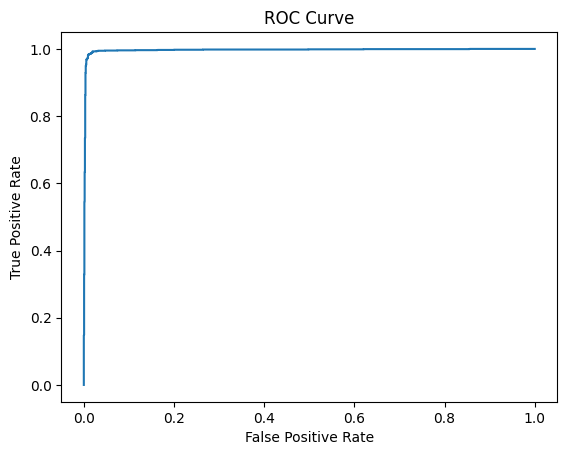

In [64]:
import numpy as np
import keras

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


@keras.saving.register_keras_serializable()
def f1_score_normal(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model = tf.keras.models.load_model(output_path + '/VGG19_Catalog_LAC_DHS_Laterality_Trained_model_June_27_2024.h5',
                                       custom_objects={'f1_score_normal': f1_score_normal})
def preprocess_input_vgg19(x):
    return tf.keras.applications.vgg19.preprocess_input(x)

graded_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg19)

classes = {'2SK0': 0, '2SK2': 1}

graded_test_generator = graded_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=data['batch_size'],
    class_mode='binary',
    classes=classes,
    shuffle=False
)


import csv

# Make sure to reset the generator before starting the predictions
# graded_test_generator.reset()

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize lists to store file names, true labels, and predicted labels
filenames = []
y_true = []
y_pred = []
scores = []

# Iterate over all batches in the graded_test_generator

for i in range(len(graded_test_generator)):
    # Get a batch of data
    batch_data = graded_test_generator[i]
    image_batch, label_batch = batch_data[0], batch_data[1]
    batch_filenames = graded_test_generator.filenames[i * graded_test_generator.batch_size : (i + 1) * graded_test_generator.batch_size]

    # Make predictions
    predictions = model.predict_on_batch(image_batch).flatten()

    # append bacth data to lists
    scores.extend(predictions)

    # Binarize the predictions
    predictions = tf.where(predictions < 0.5, 0, 1).numpy()

    # Append batch data to lists
    filenames.extend(batch_filenames)
    y_true.extend(label_batch)
    y_pred.extend(predictions)

    # For debugging, print the first batch's results
    if i == 0:
        # print("Image batch:")
        # print(image_batch)
        print("True labels:")
        print(label_batch)
        print("Predictions:")
        print(predictions)

# Write to CSV file
# with open('predictions_with_correct_predictions_and_probability_score_SG_1_NG_0.csv', 'w', newline='') as file: #s
#     writer = csv.writer(file)
#     writer.writerow(['Filename', 'True Label', 'Prediction', 'Probability Score'])

#     for i in range(len(filenames)):
#         writer.writerow([filenames[i], y_true[i], y_pred[i], scores[i]])

print("Data saved to predictions.csv")


# Compute the accuracy
accuracy = np.mean(np.array(y_pred) == np.array(y_true))
print('Accuracy:', accuracy)

# Generate a classification report and AUC score
print('Classification Report:\n', classification_report(y_true, y_pred))
print('AUC Score:', roc_auc_score(y_true, scores))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, scores)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [66]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, balanced_accuracy_score, matthews_corrcoef

# Calculate metrics using scikit-learn
sklearn_roc_auc = roc_auc_score(y_true, scores)
sklearn_f1_score = f1_score(y_true, y_pred, average='macro')
sklearn_f1_score_normal = f1_score(y_true, y_pred)
sklearn_precision = precision_score(y_true, y_pred)
sklearn_recall = recall_score(y_true, y_pred)
sklearn_accuracy = accuracy_score(y_true, y_pred)
sklearn_balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
sklearn_matthews_corrcoef = matthews_corrcoef(y_true, y_pred)

print(f'\nScikit-learn Metrics:')
print(f'ROC AUC: {sklearn_roc_auc}')
print(f'F1 Score: {sklearn_f1_score}')
print(f'F1 Score Normal: {sklearn_f1_score_normal}') #t
print(f'Precision: {sklearn_precision}')
print(f'Recall: {sklearn_recall}')
print(f'Accuracy: {sklearn_accuracy}')
print(f'Balanced Accuracy: {sklearn_balanced_accuracy}')
print(f'Matthews correlation coefficient: {sklearn_matthews_corrcoef}')



Scikit-learn Metrics:
ROC AUC: 0.9963329534690979
F1 Score: 0.9857055630515777
F1 Score Normal: 0.9857273003340419
Precision: 0.9866261398176291
Recall: 0.9848300970873787
Accuracy: 0.985705596107056
Balanced Accuracy: 0.9857077314705186
Matthews correlation coefficient: 0.9714127672916003


In [67]:
# # @title Save Execution Assets (model) and Metadata
uploaded_assets = EA.execution_upload(configuration_records.execution_rid, True)

2024-06-28 09:54:32,765 - INFO - Initializing uploader: GenericUploader v1.7.1 [Python 3.10.13, Linux-5.10.210-201.852.amzn2.x86_64-x86_64-with-glibc2.26]
2024-06-28 09:54:32,767 - INFO - Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2024-06-28 09:54:32,768 - INFO - Finished initializing AuthLoginClient. client_id='8ef15ba9-2b4a-469c-a163-7fd910c9d111', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>
2024-06-28 09:54:32,818 - INFO - Checking for updated configuration...
2024-06-28 09:54:32,959 - INFO - Updated configuration found.
2024-06-28 09:54:32,962 - INFO - Scanning files in directory [/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_laterality_training]...
2024-06-28 09:54:32,963 - INFO - Including file: [/data/sreenidhi/EyeAI_working/Execution_Assets/VGG19_Catalog_Model_LACDHS_laterality_training/VGG19_Catalog_LAC_DHS_Laterality_Trained_model_June_27_2024.h5].